<a href="https://colab.research.google.com/github/AbinayaVina1/ML_AppleQuality/blob/main/SML_AppleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
apple_data = pd.read_csv("/content/drive/MyDrive/ABISML/apple_quality.csv")
apple_data.head()

,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,140.768308,1.748063,36.840926,1.603582,0.435889,-5.535701,20.135024
1,130.577909,1.544163,52.768719,0.791819,-2.084531,1.443448,0.563379
2,158.485052,0.641405,47.784256,1.266992,8.769328,7.314439,-16.308827
3,154.251741,1.379233,55.882249,1.160391,5.220111,8.161165,-14.458797
4,136.645594,0.657810,44.088169,0.994443,5.057494,2.101578,-9.242621


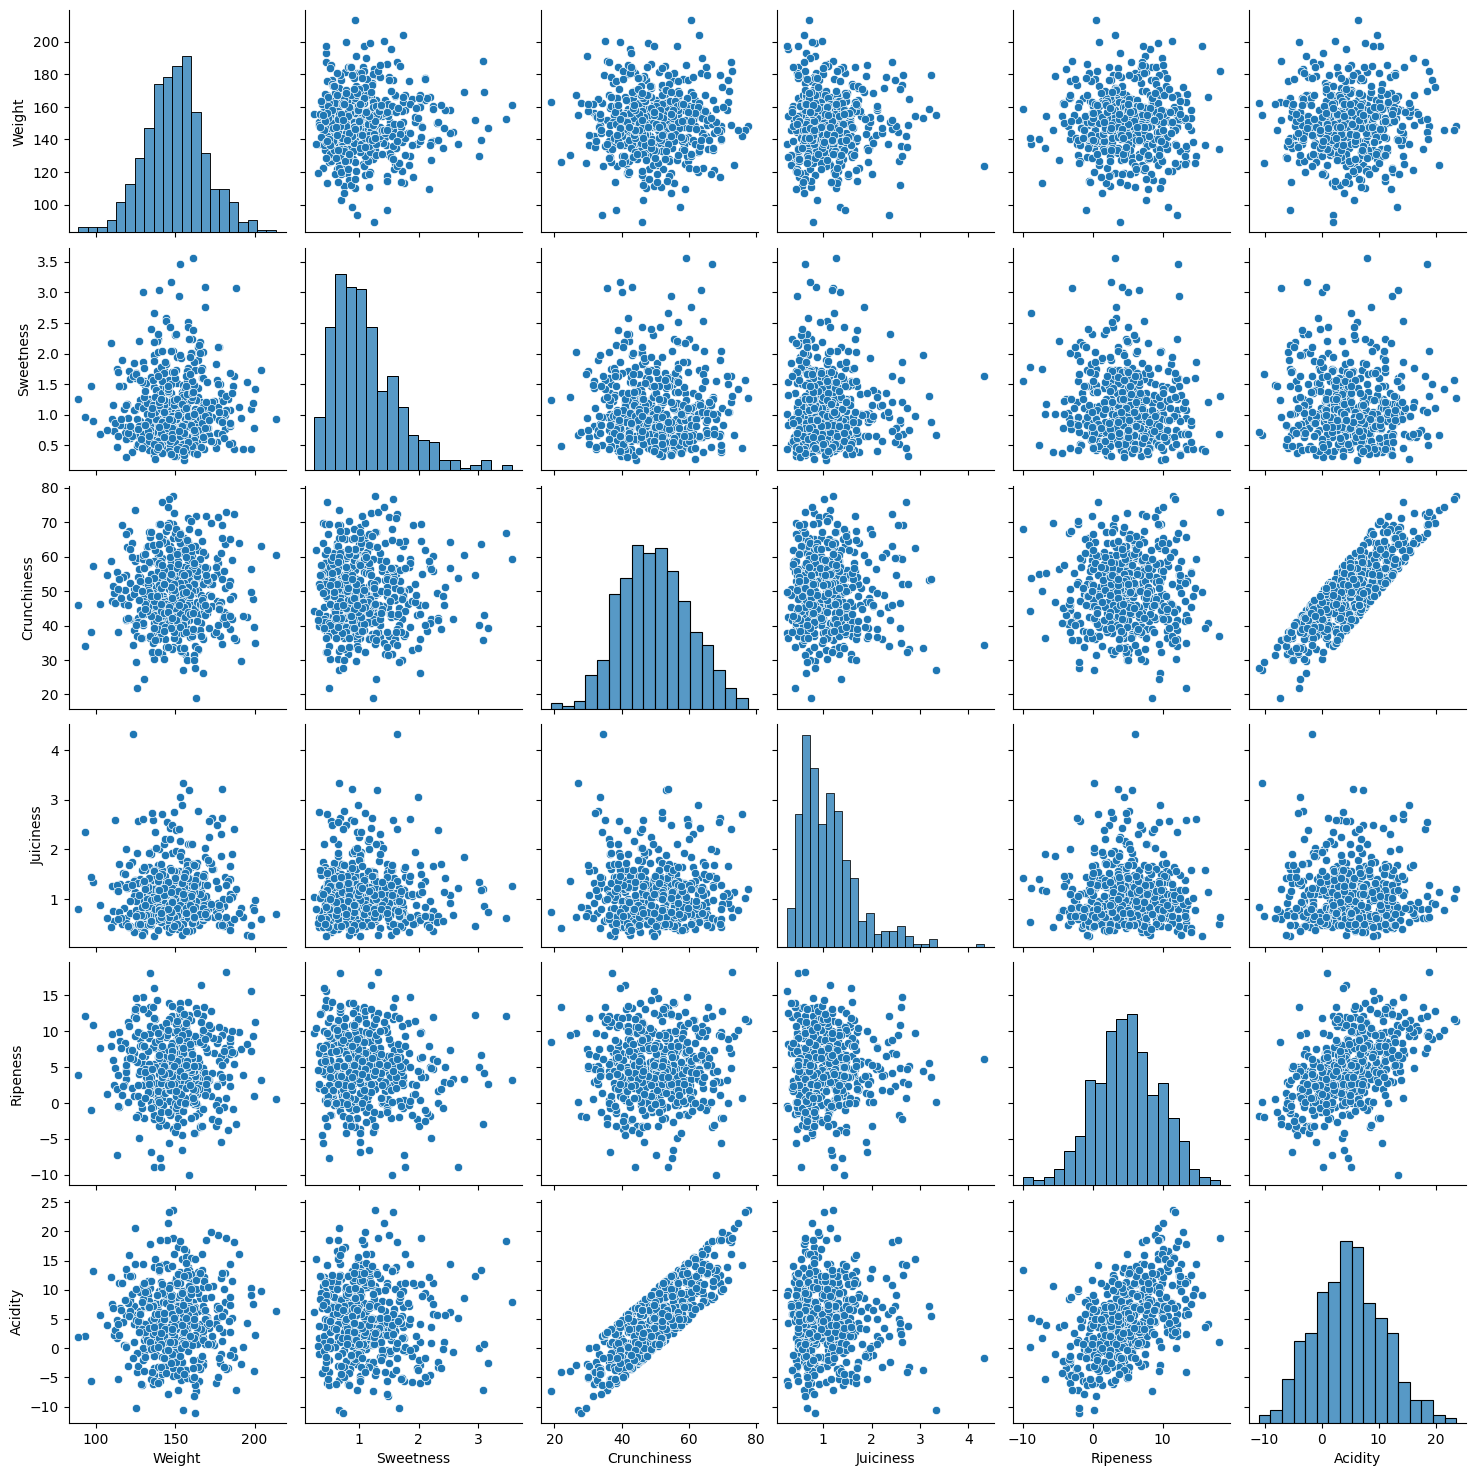

In [ ]:
apple_data.drop(columns = ["Quality"], inplace = True)
sns.pairplot(apple_data)
apple_data.Sweetness = np.log(apple_data.Sweetness)

In [ ]:
#preview
features = apple_data.columns[1:7]
target = apple_data.columns[-1]

#X and y values
X = apple_data[features].values
y = apple_data[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


The dimension of X_train is (350, 5)
The dimension of X_test is (150, 5)


In [ ]:
apple_data.isna().sum()

Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
dtype: int64

In [ ]:
apple_data=apple_data[apple_data.loc[:]!=0].dropna()

In [ ]:
apple_data.fillna(0, inplace=True)
apple_data

,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,140.768308,0.558508,36.840926,1.603582,0.435889,-5.535701
1,130.577909,0.434482,52.768719,0.791819,-2.084531,1.443448
2,158.485052,-0.444094,47.784256,1.266992,8.769328,7.314439
3,154.251741,0.321527,55.882249,1.160391,5.220111,8.161165
4,136.645594,-0.418839,44.088169,0.994443,5.057494,2.101578
...,...,...,...,...,...,...
495,184.777454,-0.137835,42.902720,0.364874,2.302727,-1.116981
496,156.720315,0.388802,49.642573,0.720527,5.337584,5.158614
497,130.516651,0.568194,56.716166,1.640235,7.929254,11.122625
498,176.924421,0.748070,40.275971,0.662712,-2.451327,-4.845810


### **Linear and Ridge Regression Models**

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (350, 5)
y_train shape: (350,)


In [ ]:
X_train_df = pd.DataFrame(X_train)

# Check for missing values
print("Missing values in X_train:", X_train_df.isnull().sum())
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_train = X_train.astype(float)
y_train = y_train.astype(float)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)

Missing values in X_train: 0    0
1    0
2    0
3    0
4    0
dtype: int64


In [ ]:
# Find columns with NaN values
nan_columns = np.isnan(X_train).any(axis=0)
print("Columns with NaN values:", nan_columns)
X_train_no_nan = X_train[~np.isnan(X_train).any(axis=1)]
y_train_no_nan = y_train[~np.isnan(X_train).any(axis=1)]
nan_columns_test = np.isnan(X_test).any(axis=0)
print("Columns with NaN values in X_test:", nan_columns_test)
X_test_no_nan = X_test[~np.isnan(X_test).any(axis=1)]

Columns with NaN values: [False False False False False]
Columns with NaN values in X_test: [False False False False False]


In [ ]:
X_test_no_nan = X_test[~np.isnan(X_test).any(axis=1)]
y_test_no_nan = y_test[~np.isnan(X_test).any(axis=1)]

In [ ]:
nan_columns_train = np.isnan(X_train).any(axis=0)
print("Columns with NaN values in X_train:", nan_columns_train)
X_train_no_nan = X_train[~np.isnan(X_train).any(axis=1)]
y_train_no_nan = y_train[~np.isnan(X_train).any(axis=1)]

Columns with NaN values in X_train: [False False False False False]


In [ ]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train_no_nan, y_train_no_nan)
#lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test_no_nan)

#actual
actual = y_test

train_score_lr = lr.score(X_train_no_nan, y_train_no_nan)
#test_score_lr = lr.score(X_test_no_nan, y_test)
test_score_lr = lr.score(X_test_no_nan, y_test_no_nan)
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train_no_nan, y_train_no_nan)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train_no_nan, y_train_no_nan)
test_score_ridge = ridgeReg.score(X_test_no_nan, y_test_no_nan)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


The train score for lr model is 1.0
The test score for lr model is 1.0

Ridge Model............................................

The train score for ridge model is 0.996403408523245
The test score for ridge model is 0.9972435542027811


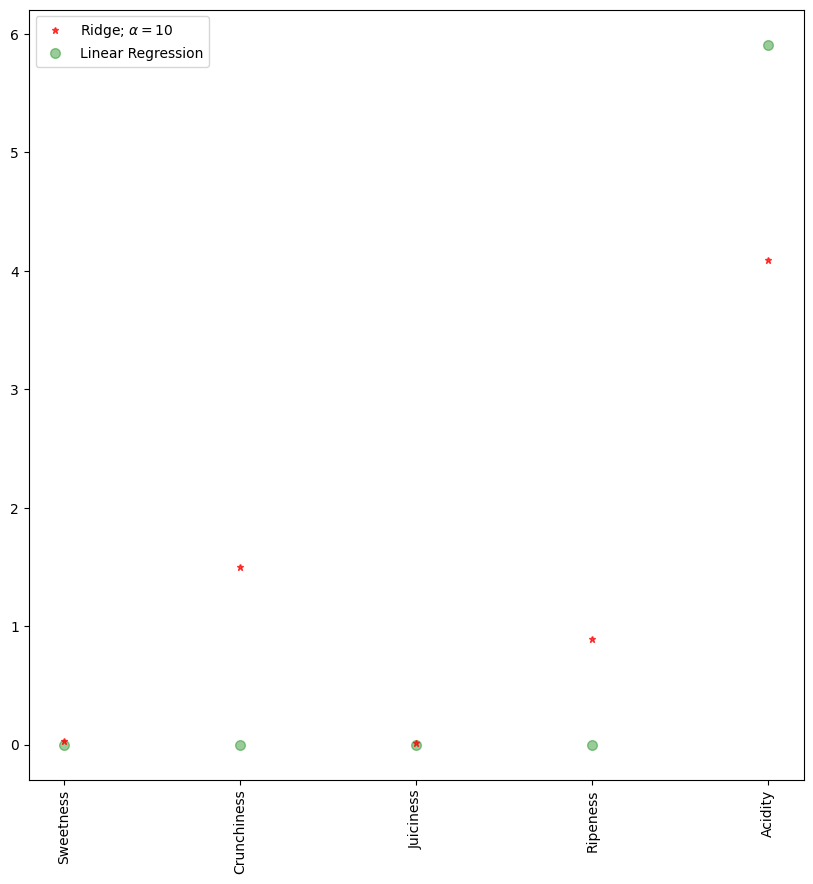

In [ ]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

### **Lasso Regression**

In [ ]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train_no_nan,y_train_no_nan)
train_score_ls =lasso.score(X_train_no_nan,y_train_no_nan)
test_score_ls =lasso.score(X_test_no_nan, y_test_no_nan)
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.003887022614042168


<Axes: >

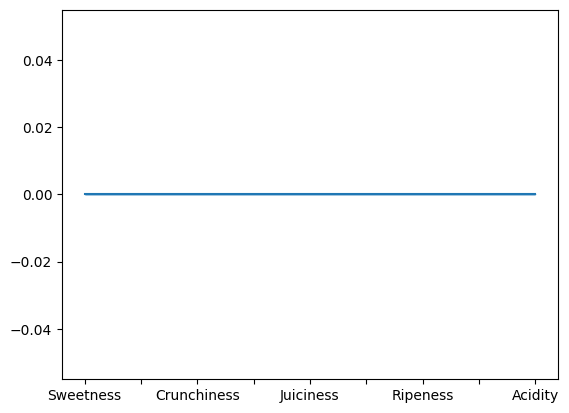

In [ ]:
pd.Series(lasso.coef_, features).sort_values(ascending=True).plot(kind="area")

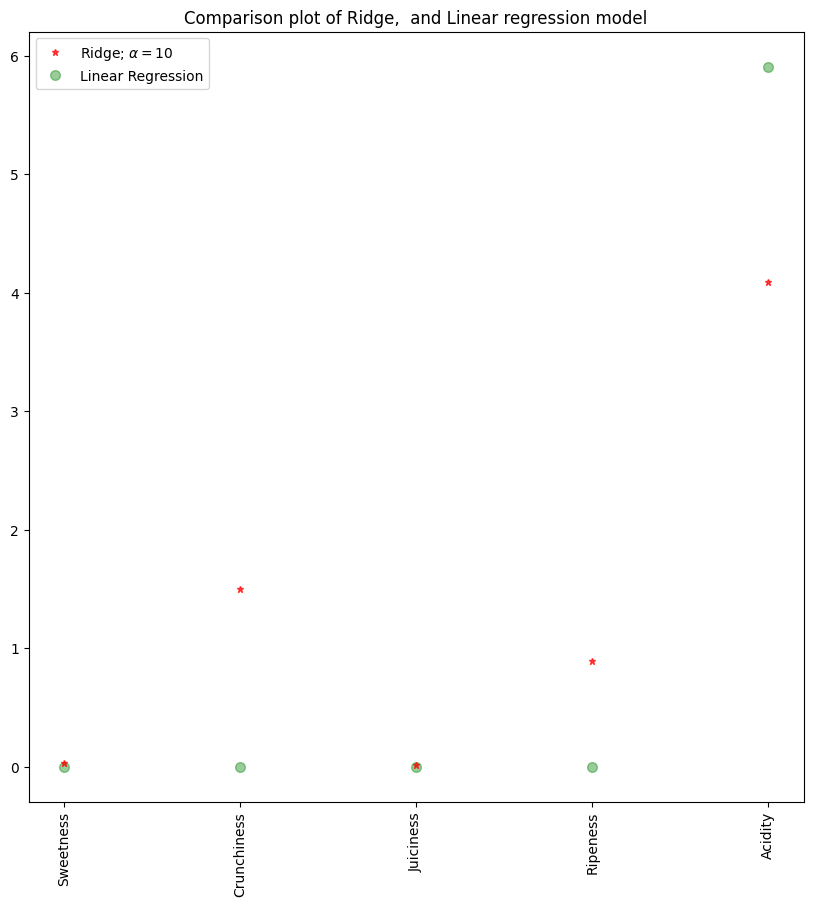

In [ ]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
#plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge,  and Linear regression model")
plt.show()


In [ ]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train_no_nan,y_train_no_nan)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train_no_nan,y_train_no_nan)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test_no_nan, y_test_no_nan)))

The train score for ridge model is 0.9999999999978032
The test score for ridge model is 0.9999999999983863
